## Exploratory Data Analysis on my Spotify personal data

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Loading and merging the datasets

The Streming History data and in general all the data files received from the request to Spotyfy are explained in [Understanding my data - webpage](https://support.spotify.com/us/article/understanding-my-data/).

In the same way, song features variables are explained in Spotify's [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features).

In [114]:
df_track_features = pd.read_csv('../data/track_features.csv')
df_artist_genres = pd.read_csv('../data/artist_genres.csv')
df_stream_hist = pd.read_csv('../data/streaming_history.csv')

In [115]:
df_stream_hist.head()

,endTime,artistName,trackName,msPlayed,track_id
0,2020-12-26 06:02,Calle 13,Tango del Pecado (feat. Bajofondo Tango Club &...,252510,6SEMpMXnOe9nvei4yk7wb7
1,2021-01-10 02:15,Keane,Nothing In My Way,20128,7falOwHJ9MjskdcNehIh79
2,2021-01-11 15:52,Machine Learning en Español,11 Estadística Inferencial,1487699,NaN
3,2021-01-11 16:08,Machine Learning en Español,12 Árboles de Decisión,748200,NaN
4,2021-01-11 17:12,Podcast – Capa 8,#00 – ¿Qué pasó con HTML5 Fácil?,231980,NaN


It will be helpful to work only with one dataframe. Let's get the features into our streaming history by merging both datasets:

In [116]:
df_spotify = df_stream_hist.merge(df_track_features, how='inner', left_on='track_id', right_on='id')
df_spotify = df_spotify.merge(df_artist_genres, how='inner', left_on='artistName', right_on='artist')

df_spotify.head(1).T

,0
endTime,2021-01-11 17:13
artistName,Danza Invisible
trackName,Agua sin sueño
msPlayed,65107
track_id,1vywengPlpJuJggJ9xOUYB
name,Agua sin sueño
danceability,0.653
energy,0.734
key,0
loudness,-6.138


### 2. Cleaning the data

We'll change some of the column names, in order to have them uniformly presented:

In [117]:
columns_map = {
    'endTime': 'end_time',
    'artistName': 'artist_name',
    'trackName': 'track_name',
    'msPlayed': 'ms_played'
}

df_spotify = df_spotify.rename(columns=columns_map)
df_spotify.columns

Index(['end_time', 'artist_name', 'track_name', 'ms_played', 'track_id',
       'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'artist', 'genre'],
      dtype='object')

The track name and track id are duplicated, let's get rid of one of them. We're going to get rid of `track_href`, `analysis_url` and `uri` features as well, they're usless for our porposes:

In [118]:
df_spotify = df_spotify.drop(['name', 'id', 'track_href', 'analysis_url', 'uri'], axis=1)
df_spotify.columns

Index(['end_time', 'artist_name', 'track_name', 'ms_played', 'track_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature', 'artist', 'genre'],
      dtype='object')

The variable `['ms_palyed', 'duration_ms']` stands for miliseconds the song was played and it lenth respectively, let's tranformed them into seconds:

In [119]:
df_spotify['ms_played'] = round((df_spotify['ms_played'] / 1000), 1)
df_spotify['duration_ms'] = round((df_spotify['duration_ms'] / 1000), 1)

In [120]:
col_map = {
    'ms_played': 'seconds_played',
    'duration_ms': 'duration_s'
}

df_spotify.columns

Index(['end_time', 'artist_name', 'track_name', 'ms_played', 'track_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature', 'artist', 'genre'],
      dtype='object')

In [121]:
df_spotify[['ms_played', 'duration_ms']]

,ms_played,duration_ms
0,65.1,308.7
1,50.4,308.7
2,182.6,215.9
3,2.1,215.9
4,28.0,215.9
...,...,...
1872,222.0,222.0
1873,200.6,357.0
1874,71.4,244.9
1875,9.1,189.1


These columns are not in ms anymore, let's change their names:

In [132]:
cols_map = {
    'ms_played': 'sec_played',
    'duration_ms': 'duration_sec'
} 

df_spotify.rename(columns=cols_map, inplace=True)

df_spotify.columns

Index(['end_time', 'artist_name', 'track_name', 'sec_played', 'track_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_sec', 'time_signature', 'artist', 'genre',
       'year_played', 'month_played', 'day_played', 'day_of_week_played',
       'hour_played'],
      dtype='object')

The times are in UTC format, so it would be useful to have them in my country time, but first we have to chage the `end_time` type column form `object` to `datetme`. Costa Rica is UTC-6: 

In [133]:
import datetime

In [134]:
df_spotify['end_time'] = pd.to_datetime(df_spotify['end_time'])

In [135]:
df_spotify['end_time'] = df_spotify['end_time'] - pd.Timedelta(hours=6)
df_spotify['end_time']

0      2021-01-11 05:13:00
1      2021-07-16 05:58:00
2      2021-01-11 05:22:00
3      2021-01-11 05:39:00
4      2021-08-26 08:16:00
               ...        
1872   2022-01-09 19:19:00
1873   2022-01-09 19:22:00
1874   2022-01-11 02:52:00
1875   2022-01-11 03:01:00
1876   2022-01-11 03:12:00
Name: end_time, Length: 1877, dtype: datetime64[ns]

#### 2.1 Looking for missing values and checking data types

In [136]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1876
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   end_time            1877 non-null   datetime64[ns]
 1   artist_name         1877 non-null   object        
 2   track_name          1877 non-null   object        
 3   sec_played          1877 non-null   float64       
 4   track_id            1877 non-null   object        
 5   danceability        1877 non-null   float64       
 6   energy              1877 non-null   float64       
 7   key                 1877 non-null   int64         
 8   loudness            1877 non-null   float64       
 9   mode                1877 non-null   int64         
 10  speechiness         1877 non-null   float64       
 11  acousticness        1877 non-null   float64       
 12  instrumentalness    1877 non-null   float64       
 13  liveness            1877 non-null   float64     

As we see, spotify sent us a very complete dataset, and the features extraction through the API was successfully performed [by this process](https://github.com/anferben/my_spotify_analytics/blob/main/notebooks/01.1-getting-song-features.ipynb). However, we see some nulls in the genre feature, we'll deal with them later in the analysis.

Now it's time to deal with the `object` type for `end_time` feature:

In [137]:
df_spotify['end_time'] = pd.to_datetime(df_spotify['end_time'])
df_spotify.dtypes[:1]  #we knew that end_time was the first feature in the dataset

end_time    datetime64[ns]
dtype: object

#### 2.2 Data enrichment

For EDA porposes, it would be helpful to split the `end_date` columns into year, month, day and hour. This I will be able to answer some certain questions later.

In [138]:
df_spotify['year_played'] = df_spotify['end_time'].dt.year
df_spotify['month_played'] = df_spotify['end_time'].dt.month
df_spotify['day_played'] = df_spotify['end_time'].dt.day
df_spotify['day_of_week_played'] = df_spotify['end_time'].dt.day_name()
df_spotify['hour_played'] = df_spotify['end_time'].dt.hour

In [139]:
df_spotify.head(1).T

,0
end_time,2021-01-11 05:13:00
artist_name,Danza Invisible
track_name,Agua sin sueño
sec_played,65.1
track_id,1vywengPlpJuJggJ9xOUYB
danceability,0.653
energy,0.734
key,0
loudness,-6.138
mode,1


### 2. General exploration

Total songs played during the last year:

In [140]:
df_spotify.shape[0]

1877

Converting total listening time to hours:

In [142]:
df_spotify['duration_sec'].sum() / 3600

118.81216666666667

Computing the mean songs listened by day:

In [144]:
df_spotify.shape[0] / 365

5.142465753424657

As we see, I played a total of 1877 non-unique songs during the last 12 months, aproximatley from January 2021 to January 2022, which means a total of 118.8 hours listening to music. This also means the I listened aproximately 5 song per day.

However, I don't listen to music every single day, so let's see the actual listening behavior, looking at the total songs played by month: 

<AxesSubplot:xlabel='month_played'>

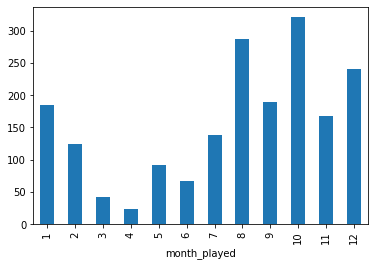

In [145]:
df_grouped = df_spotify[['month_played', 'track_name']].groupby('month_played').count()
df_grouped.plot(kind='bar', legend=False) 

This show us that the second half of the year was way more active than the first one.

### 3. Answering some questions

#### Q1. What was my top 5 songs played last year?

In [146]:
df_spotify[['track_name', 'artist_name']].value_counts()[:5]

track_name         artist_name  
Billie Bossa Nova  Billie Eilish    15
Oxytocin           Billie Eilish    15
Getting Older      Billie Eilish    13
Smile              Lily Allen       12
my future          Billie Eilish    12
dtype: int64

This is very interesting, I've never herd Billie Eilish before, until Spotify suggested me as a new album release. I listened to it and I got hooked! It's a great album but I didn't imagine that 4 out of 5 songs would be from her.

I didn't expected for Lily Allen's song Smile. It's an old one, I just remembered that it existed and now I'm sorprised that is #4 in my top 5... wow!

#### Q2. Do we have similar results if we look at the top 5 artists?

In [147]:
df_spotify['artist_name'].value_counts()[:5]

Billie Eilish          95
Heroes Del Silencio    38
Los Garbanzos          38
Pearl Jam              28
Mala Rodríguez         25
Name: artist_name, dtype: int64

We would answer yes, and this blows my mind. I listened to Billie Eilish a little more than 2X times than HdS, listening to only __one album__. That's pretty intense.

#### Q3. What about the genres?

I usually say that my favorite genre is rock, but how accurate is this? Let's find out:

In [165]:
df_spotify['genre'].value_counts()[:5]

alternative metal    188
latin alternative    174
alternative rock     146
art pop              109
rain                  74
Name: genre, dtype: int64

The first three guy in the list may be telling us that I'm not lying. Interesting seeing __rain__ here, these are the rain sound tracks that I used to listen to when I go to sleep.

So 196 different music styles that I listened to last yaer but, is it the same when we use not just the songs count, but the time a song was played?

Let's set a threshold for stablishing if I listened to a song instead of just skipping it as soon as it started:

In [159]:
mask = np.where(1 - ((df_spotify['duration_sec'] - df_spotify['sec_played']) / df_spotify['duration_sec']) >= 0.7,
         'yes',
         'no')

df_spotify['song_listened'] = mask

In [160]:
df_spotify['song_listened']

0        no
1        no
2       yes
3        no
4        no
       ... 
1872    yes
1873     no
1874     no
1875     no
1876     no
Name: song_listened, Length: 1877, dtype: object

Let's repeat our analysis just for listening to songs:

In [161]:
df_listen = df_spotify[df_spotify['song_listened'] == 'yes']

Top 5 most listened to songs:

In [162]:
df_listen[['track_name', 'artist_name']].value_counts()[:5]

track_name         artist_name   
Oxytocin           Billie Eilish     14
Billie Bossa Nova  Billie Eilish     14
Getting Older      Billie Eilish     12
La Niña            Mala Rodríguez    10
Your Power         Billie Eilish      9
dtype: int64

Top 5 most listened artists:

In [164]:
df_listen['artist_name'].value_counts()[:5]

Billie Eilish          79
Heroes Del Silencio    28
Los Garbanzos          23
Mala Rodríguez         23
Pearl Jam              23
Name: artist_name, dtype: int64

Top 5 most listened genres:

In [166]:
df_listen['genre'].value_counts()[:5]

latin alternative    126
alternative metal    112
art pop               89
alternative rock      86
rain                  69
Name: genre, dtype: int64

In [173]:
numerical = ['sec_played', 'danceability', 'energy', 'key', 'loudness', 'mode',
             'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
             'tempo', 'type', 'duration_sec', 'time_signature']

corr_matrix = df_spotify[numerical].corr()

ploting some bubble charts using genre...